In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
sample='2013-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'
sample

'2013-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'

In [3]:
sample=sample.split()
sample

['2013-01-01',
 '2013-01-01',
 '24',
 '34',
 '34',
 '34',
 '35',
 '35',
 '35',
 '35',
 '36',
 '36',
 '36',
 '37',
 '36',
 '36',
 '35',
 '34',
 '33',
 '32',
 '31',
 '30',
 '29',
 '26',
 '25',
 '23',
 '22',
 '1']

In [4]:
startdate=sample[0]
enddate=sample[1]
count=sample[2]
temperature=sample[3:-1]
predict_days=sample[-1]

In [5]:
from datetime import datetime,timedelta
startdatetime=datetime.strptime(startdate,'%Y-%m-%d')
tmp=[]
for i in range(int(count)):
    row=(startdatetime,temperature[i])
    tmp.append(row)
    startdatetime+=timedelta(hours=1)
labels=['datetime','temp']
result=pd.DataFrame.from_records(tmp,columns=labels)
result

,datetime,temp
0,2013-01-01 00:00:00,34
1,2013-01-01 01:00:00,34
2,2013-01-01 02:00:00,34
3,2013-01-01 03:00:00,35
4,2013-01-01 04:00:00,35
5,2013-01-01 05:00:00,35
6,2013-01-01 06:00:00,35
7,2013-01-01 07:00:00,36
8,2013-01-01 08:00:00,36
9,2013-01-01 09:00:00,36


In [6]:
temp=pd.read_csv('/content/temperature.csv')
temp.head(3)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.83000,287.170000,307.59,305.47,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.83465,287.186092,307.59,304.31,310.495769,304.4,304.4,303.5


In [7]:
boston=temp.loc[:,['datetime','Boston']]
boston.head(3)

,datetime,Boston
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,287.170000
2,2012-10-01 14:00:00,287.186092


In [8]:
print(boston.isnull().sum())
boston.fillna(method='bfill',inplace=True)
boston.isnull().sum()

datetime    0
Boston      4
dtype: int64


datetime    0
Boston      1
dtype: int64

In [12]:
!pip install pandas
import pandas as pd
boston.info()
boston.iloc[:,1].isnull().sum()
boston.iloc[:,1]=boston.iloc[:,1].fillna(boston.iloc[:,1].mean())
boston.iloc[:,1]=boston.iloc[:,1].apply(round)
boston.iloc[:,1]=boston.iloc[:,1]-273.15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700 entries, 0 to 14699
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  14700 non-null  object 
 1   Boston    14699 non-null  float64
dtypes: float64(1), object(1)
memory usage: 229.8+ KB


<ipython-input-12-581aed004b6b>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  boston.iloc[:,1]=boston.iloc[:,1].apply(round)


In [13]:
boston.iloc[:,1]=boston.iloc[:,1].apply(round)-273.15

#select part of data into train test split
bostonsample=boston[boston['datetime']>='2013-01-01 00:00:00']
bostonsample=bostonsample.iloc[0:12*(154+48)]

bostonsample['datetime']=pd.to_datetime(bostonsample['datetime'])
bostonsample.columns=['time','temp']
bostonsample

,time,temp
2196,2013-01-01 00:00:00,-277.15
2197,2013-01-01 01:00:00,-277.15
2198,2013-01-01 02:00:00,-278.15
2199,2013-01-01 03:00:00,-279.15
2200,2013-01-01 04:00:00,-279.15
...,...,...
4615,2013-04-11 19:00:00,-256.15
4616,2013-04-11 20:00:00,-257.15
4617,2013-04-11 21:00:00,-258.15
4618,2013-04-11 22:00:00,-260.15


In [14]:
train=bostonsample[0:77*24]
test=bostonsample[77*24:]
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00


In [15]:
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
#import plotly.plotly as py # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go # plotly graphical object

plt.style.use('ggplot')

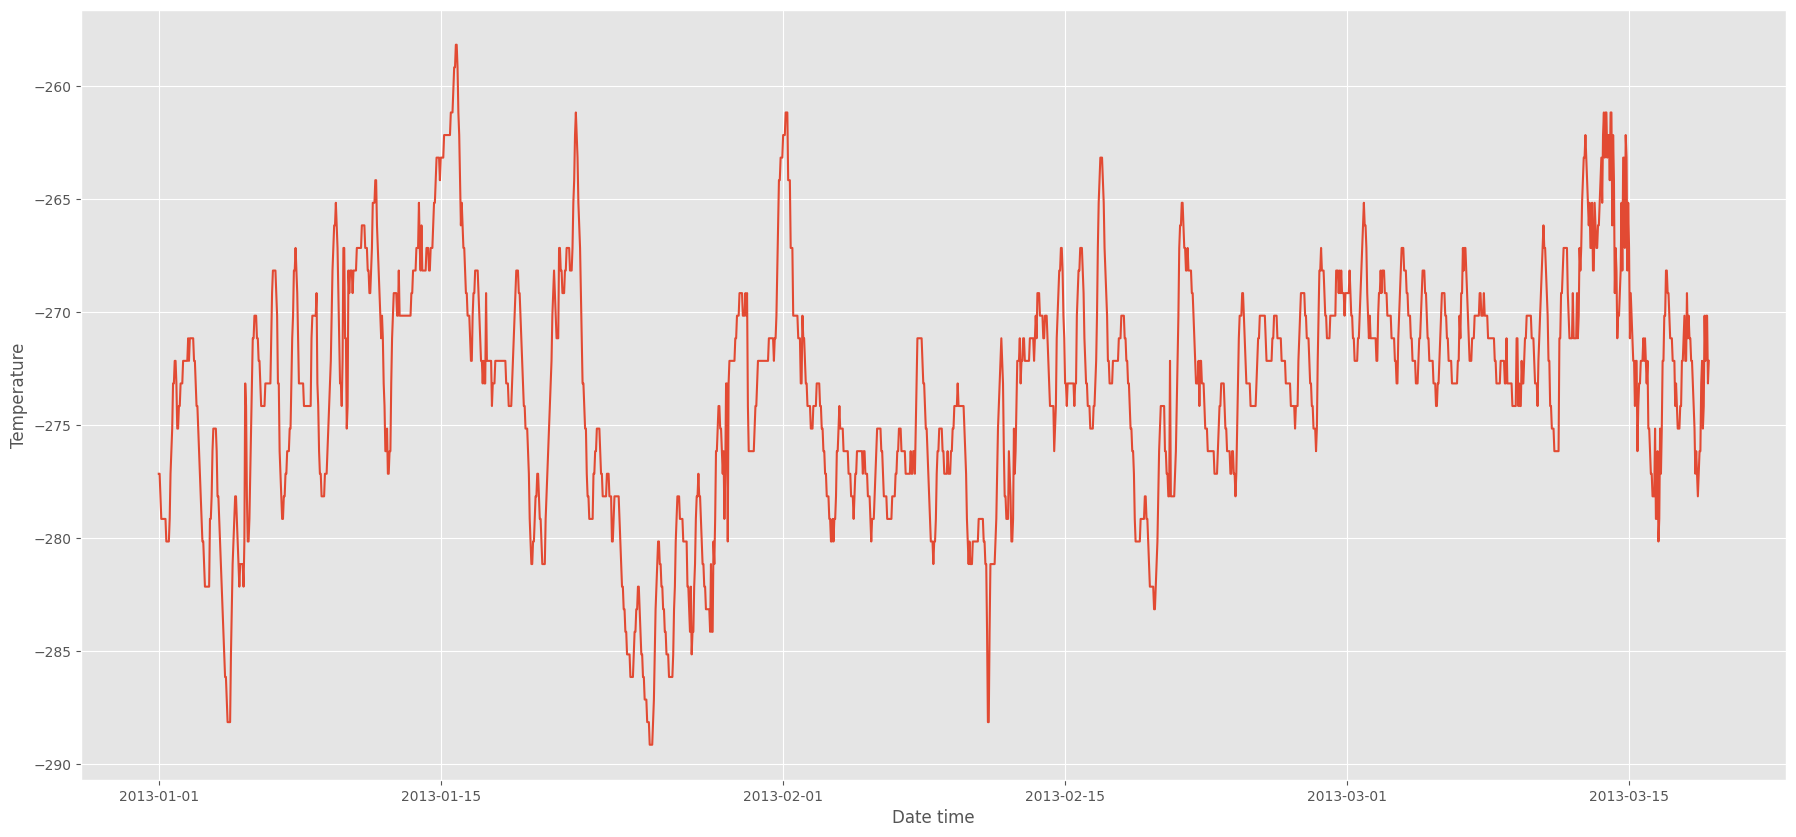

In [16]:
plt.figure(figsize=(22,10))
plt.plot(train.time,train.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
ts=train
ts.index=ts.time
ts.drop('time',inplace=True,axis=1)
ts.head()


In [22]:
ts.rolling(window=6).mean().head(10)

,temp
time,
2013-01-01 00:00:00,NaN
2013-01-01 01:00:00,NaN
2013-01-01 02:00:00,NaN
2013-01-01 03:00:00,NaN
2013-01-01 04:00:00,NaN
2013-01-01 05:00:00,-278.316667
2013-01-01 06:00:00,-278.650000
2013-01-01 07:00:00,-278.983333
2013-01-01 08:00:00,-279.150000


In [19]:
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

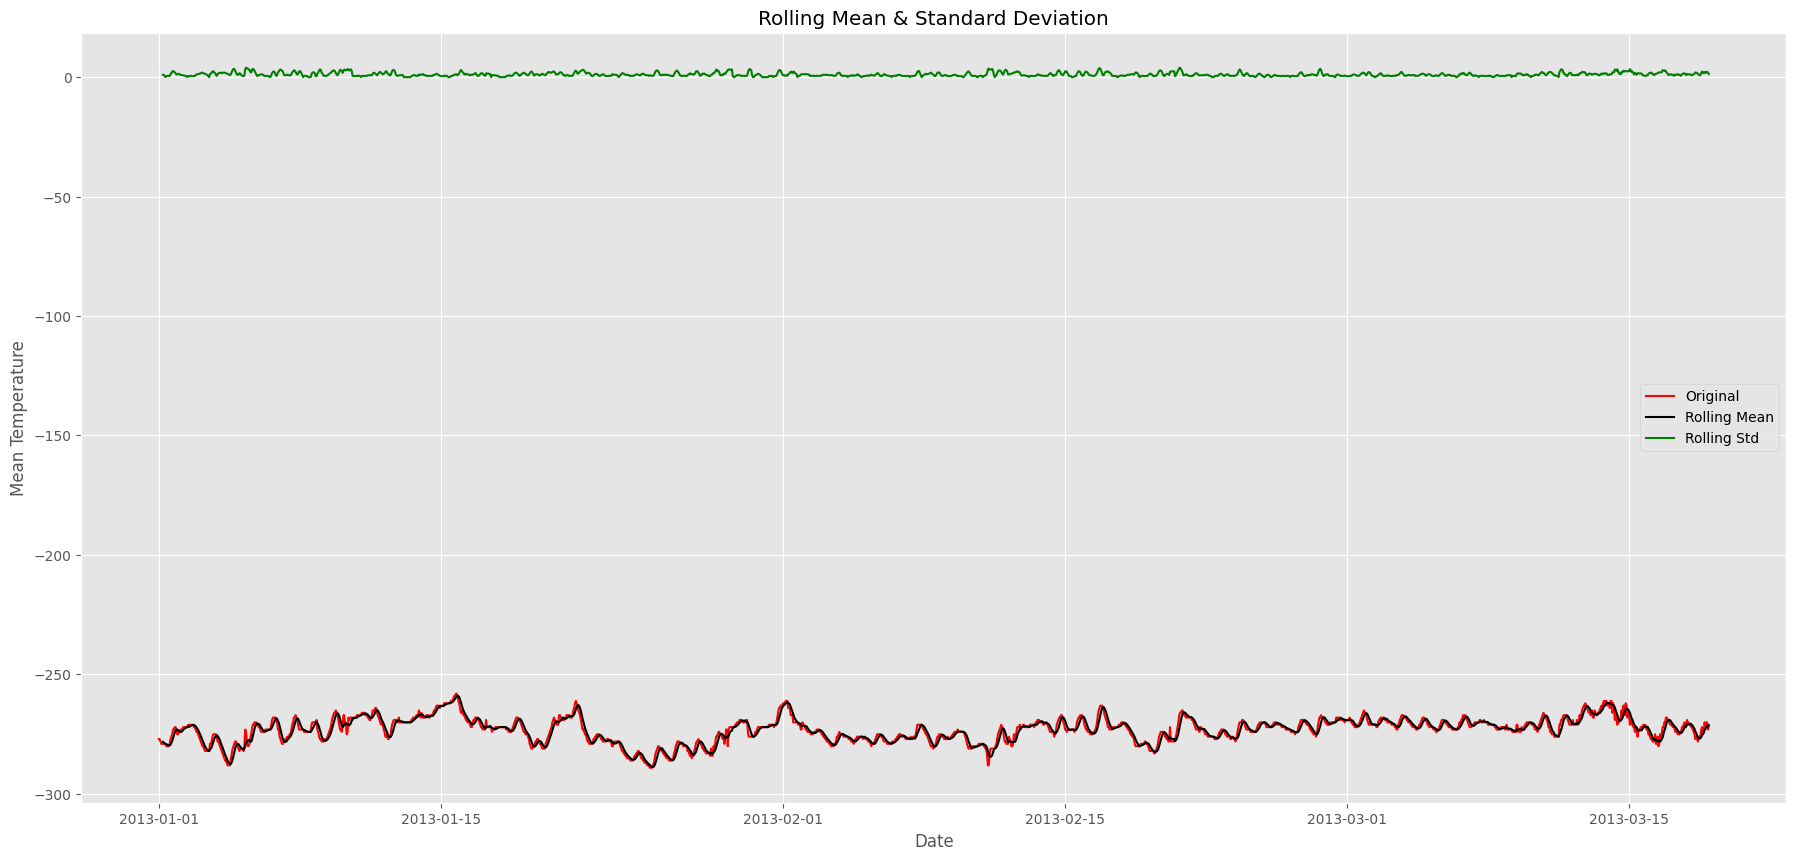

Test statistic:  -4.80575767844081
p-value:  5.302329901256319e-05
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [23]:
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts.temp)
check_adfuller(ts.temp)

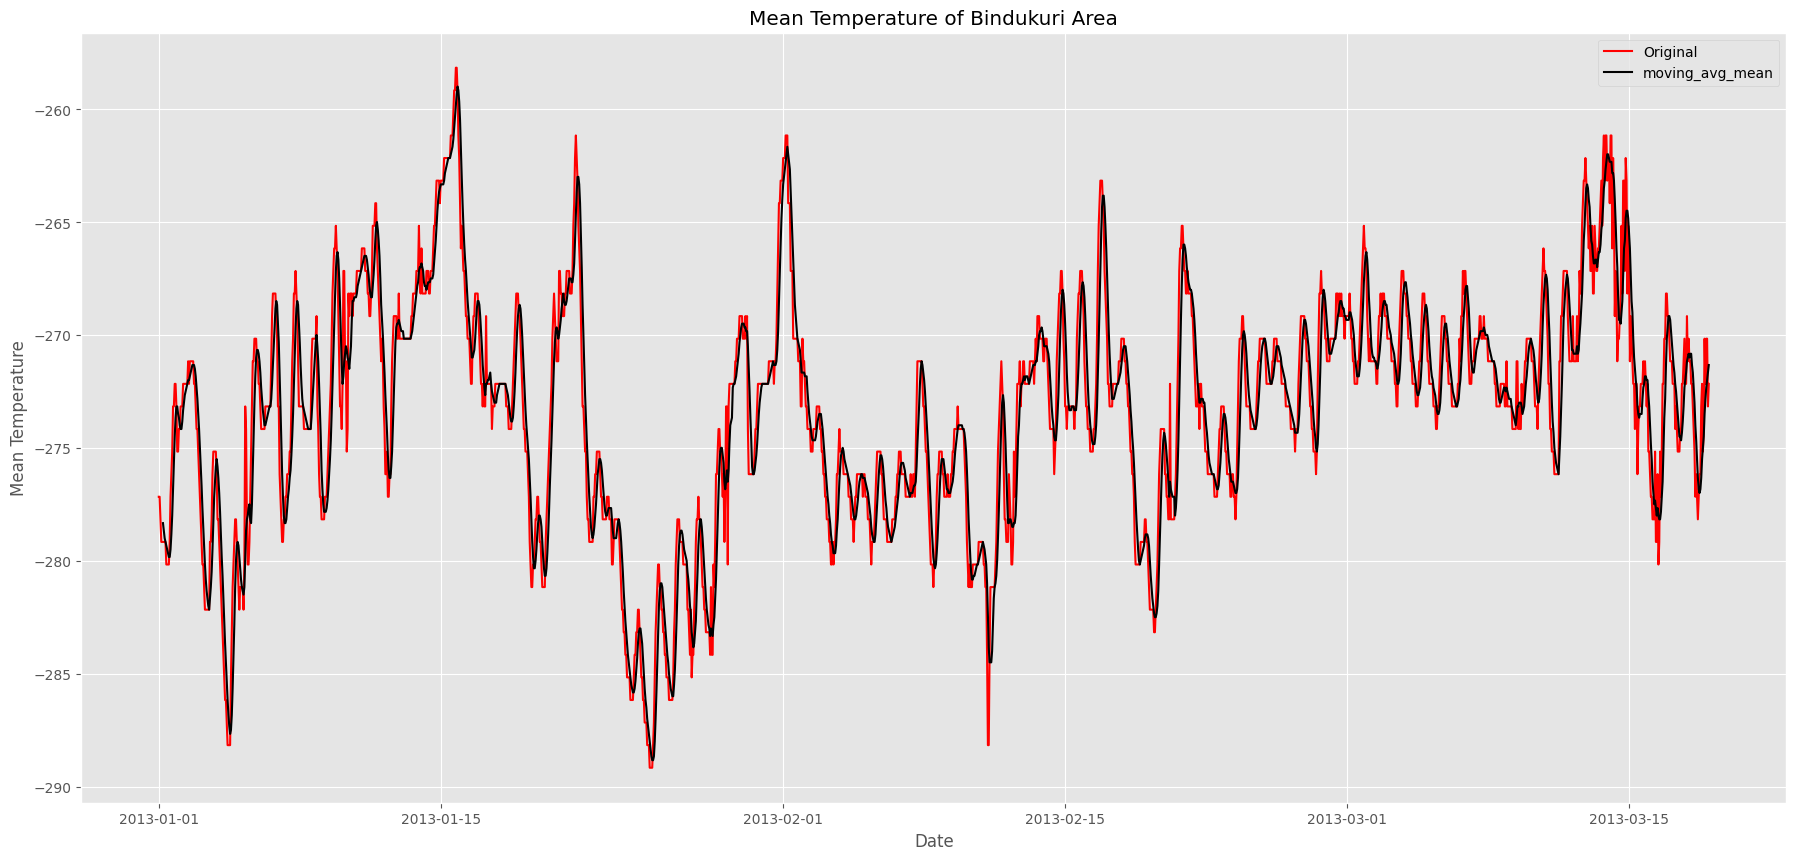

In [24]:
window_size = 6
moving_avg = ts.rolling(window=window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()